In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked business class tic...
1,✅ Trip Verified | I will never travel with Br...
2,✅ Trip Verified | I am already in Portugal so...
3,✅ Trip Verified | Terrible. Avoid this airlin...
4,✅ Trip Verified | Despite being a gold member...


In [14]:
import re

def clean_review(text):
    # Remove everything before the "|" symbol
    text = re.sub(r'^[^|]*\|', '', text)
    # Remove "Trip Verified" label
    text = text.replace("Trip Verified", "")
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Create new DataFrame with cleaned reviews
cleaned_df = pd.DataFrame()
cleaned_df["clean_reviews"] = df["reviews"].apply(clean_review)



In [16]:
cleaned_df.head()

,clean_reviews
0,i booked business class tickets for my fianc a...
1,i will never travel with british airways again...
2,i am already in portugal so contacted them tod...
3,terrible avoid this airline its now becoming r...
4,despite being a gold member the british airway...


In [17]:
df.head()

,reviews
0,I booked business class tickets for my fianc...
1,I will never travel with British Airways aga...
2,I am already in Portugal so contacted them t...
3,Terrible. Avoid this airline. It’s now becom...
4,"Despite being a gold member, the British Air..."


In [18]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            wn_tag = pos_dict.get(tag[0].upper(), wordnet.NOUN)
            newlist.append(tuple([word, wn_tag]))
    return newlist 

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tagged_tokens = token_stop_pos(text)
    lemmatized_words = []
    for token, tag in tagged_tokens:
        lemma = lemmatizer.lemmatize(token, tag)
        lemmatized_words.append(lemma)
    return " ".join(lemmatized_words)

df['Lemmatized Reviews'] = df['Cleaned Reviews'].apply(lemmatize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
df.head()

,reviews,Cleaned Reviews,POS Tagged,Lemmatized Reviews
0,I booked business class tickets for my fianc...,booked business class tickets fiancé reschedul...,"[(booked, VBN), (business, NN), (class, NN), (...",book business class ticket fiancé reschedule f...
1,I will never travel with British Airways aga...,never travel british airways spent business cl...,"[(never, RB), (travel, VBP), (british, JJ), (a...",never travel british airway spend business cla...
2,I am already in Portugal so contacted them t...,already portugal contacted today cancelled ret...,"[(already, RB), (portugal, JJ), (contacted, VB...",already portugal contact today cancel return f...
3,Terrible. Avoid this airline. It’s now becom...,terrible avoid airline becoming regular practi...,"[(terrible, JJ), (avoid, JJ), (airline, NN), (...",terrible avoid airline become regular practice...
4,"Despite being a gold member, the British Air...",despite gold member british airways staff heat...,"[(despite, IN), (gold, JJ), (member, NN), (bri...",despite gold member british airway staff heath...


In [26]:
!pip install textblob



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from textblob import TextBlob

def sentiment_analysis(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

df['Sentiment Score'] = df['Lemmatized Reviews'].apply(sentiment_analysis)


In [28]:
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Category'] = df['Sentiment Score'].apply(sentiment_category)


In [29]:
df.head()

,reviews,Cleaned Reviews,POS Tagged,Lemmatized Reviews,Sentiment Score,Sentiment Category
0,I booked business class tickets for my fianc...,booked business class tickets fiancé reschedul...,"[(booked, VBN), (business, NN), (class, NN), (...",book business class ticket fiancé reschedule f...,0.071296,Positive
1,I will never travel with British Airways aga...,never travel british airways spent business cl...,"[(never, RB), (travel, VBP), (british, JJ), (a...",never travel british airway spend business cla...,-0.046433,Negative
2,I am already in Portugal so contacted them t...,already portugal contacted today cancelled ret...,"[(already, RB), (portugal, JJ), (contacted, VB...",already portugal contact today cancel return f...,-0.266667,Negative
3,Terrible. Avoid this airline. It’s now becom...,terrible avoid airline becoming regular practi...,"[(terrible, JJ), (avoid, JJ), (airline, NN), (...",terrible avoid airline become regular practice...,-0.014286,Negative
4,"Despite being a gold member, the British Air...",despite gold member british airways staff heat...,"[(despite, IN), (gold, JJ), (member, NN), (bri...",despite gold member british airway staff heath...,-0.061667,Negative


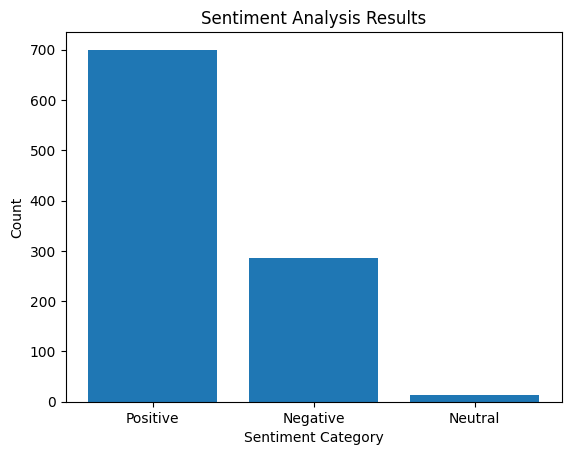

In [32]:
import matplotlib.pyplot as plt


sentiment_counts = df['Sentiment Category'].value_counts()


fig, ax = plt.subplots()
ax.bar(sentiment_counts.index, sentiment_counts.values)
ax.set_title('Sentiment Analysis Results')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
plt.show()


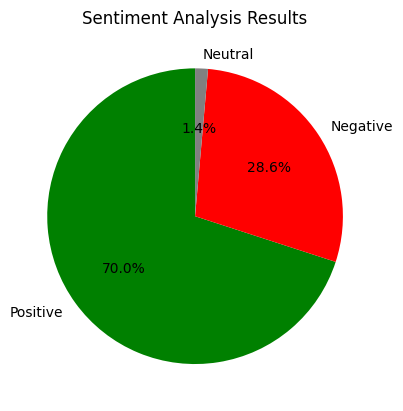

In [33]:
counts = df['Sentiment Category'].value_counts()

# Create a pie chart
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['green', 'red', 'gray']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis Results')

plt.show()

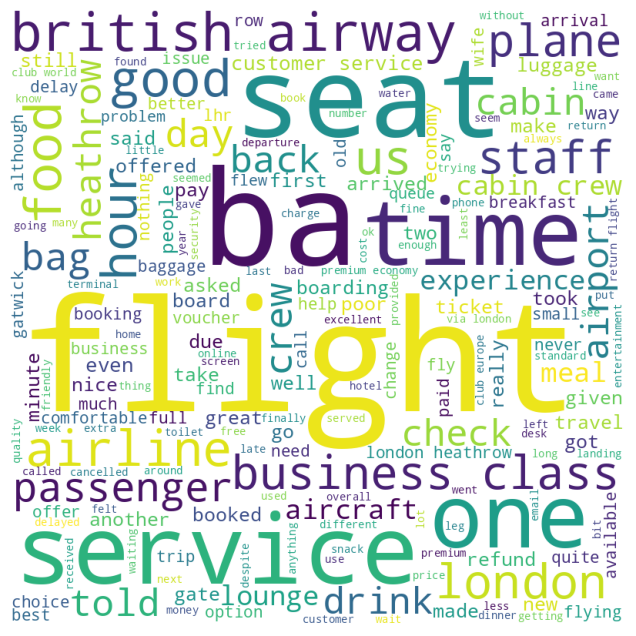

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all the reviews
all_reviews = ' '.join(df['Cleaned Reviews'])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)

# plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [40]:

average_rating = df['Sentiment Score'].mean() * 2
average_rating*10

2.0822909884232357

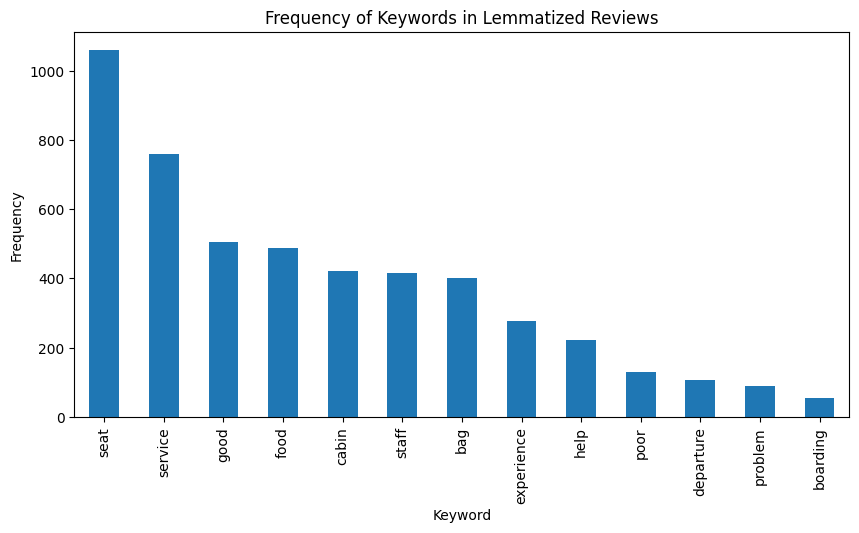

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a list of keywords to search for in the lemmatized reviews
keywords = ['seat', 'food', 'bag', 'service', 'staff', 'cabin', 'departure', 'problem', 'experience', 'help', 'boarding', 'poor', 'good']

# Initialize a dictionary to keep track of the frequency of each keyword
freq_dict = {keyword: 0 for keyword in keywords}

# Count the frequency of each keyword in the lemmatized reviews
for review in df['Lemmatized Reviews']:
    for keyword in keywords:
        freq_dict[keyword] += review.count(keyword)

# Convert the dictionary to a Pandas DataFrame
df_freq = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency in descending order
df_freq = df_freq.sort_values(by=['Frequency'], ascending=False)

# Create a bar chart of the frequency of each keyword
ax = df_freq.plot(kind='bar', figsize=(10, 5), legend=False)
ax.set_xlabel('Keyword')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Keywords in Lemmatized Reviews')
plt.show()
